# Solar Power Forecasting



## 1. Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
from keras.optimizers import RMSprop, Adam, SGD
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing the Dataset

In [2]:
data = pd.read_csv('dataset.csv')
data.head(10)

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
5,8.69,29,1034.6,0.0,0.0,0.0,0,0,0,449.45,...,23.63,7.10,30.47,6.92,27.90,17.28,25.088167,65.700860,197.22062,2546.081600
6,9.72,27,1034.0,0.0,0.0,0.0,0,0,0,469.92,...,25.02,6.61,29.36,6.44,26.57,12.96,36.197514,70.351498,211.21422,2270.320700
7,10.07,28,1034.1,0.0,0.0,0.0,0,0,0,436.99,...,14.74,7.63,19.29,7.52,16.70,10.80,49.073008,77.228779,223.65641,1063.830200
8,9.38,32,1033.9,0.0,0.0,0.0,0,0,0,353.33,...,6.58,10.50,5.91,10.14,6.12,11.52,62.371140,85.585411,234.50308,86.817611
9,6.54,47,1035.1,0.0,0.0,0.0,0,0,0,228.73,...,360.00,12.25,1.68,11.53,1.79,12.24,105.866560,121.463180,216.06756,9.666667


<AxesSubplot:>

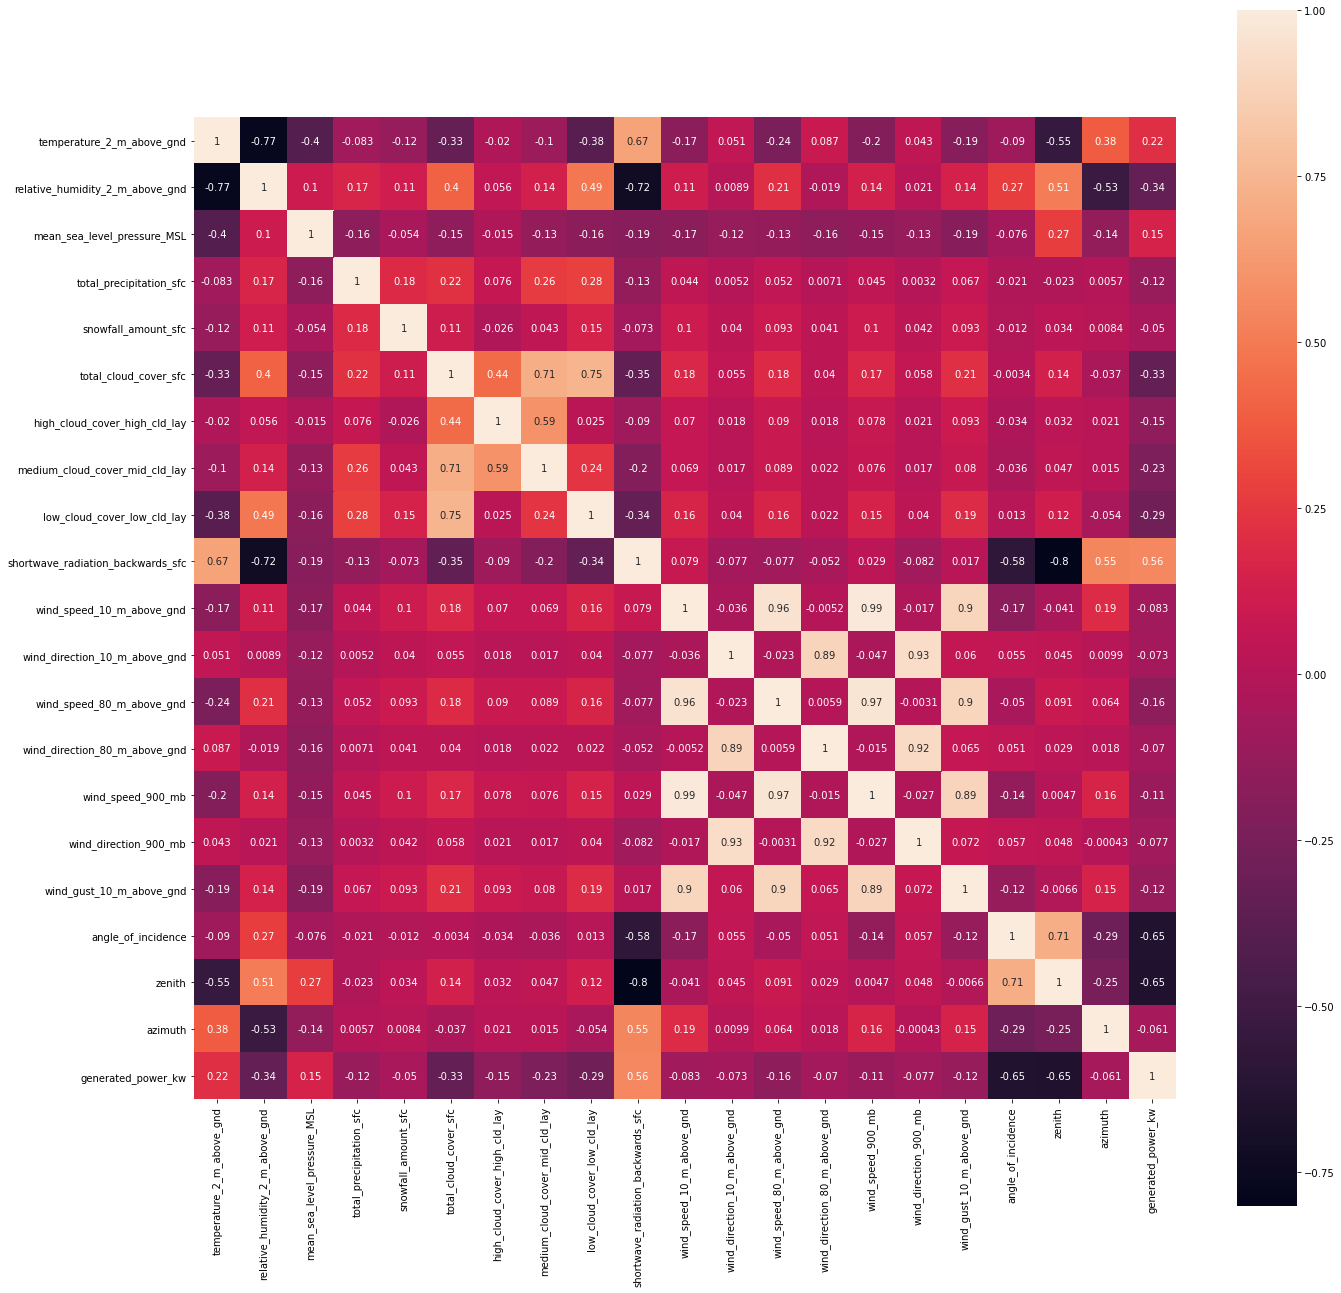

In [3]:
corr_heat = data.corr()
plt.figure(figsize = (22,22))
sns.heatmap(corr_heat, annot = True, square = True)

In [4]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y = np.reshape(y, (-1,1))
print(x.shape, y.shape)

(4213, 20) (4213, 1)


In [5]:
x

array([[   2.17    ,   31.      , 1035.      , ...,   58.753108,
          83.237322,  128.33543 ],
       [   2.31    ,   27.      , 1035.1     , ...,   45.408585,
          75.143041,  139.6553  ],
       [   3.65    ,   33.      , 1035.4     , ...,   32.848282,
          68.820648,  152.53769 ],
       ...,
       [   7.27    ,   90.      , 1026.3     , ...,   25.249506,
          65.827032,  197.33868 ],
       [   8.25    ,   81.      , 1025.5     , ...,   36.361161,
          70.496313,  211.30027 ],
       [   8.      ,   80.      , 1025.3     , ...,   48.452849,
          76.919574,  223.04931 ]])

In [6]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

## 3. Splitting the Dataset

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("Train Shape: {} {} \nTest Shape: {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Train Shape: (3370, 20) (3370, 1) 
Test Shape: (843, 20) (843, 1)


## 4. Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
x_train = x_sc.fit_transform(x_train)
x_test = x_sc.transform(x_test)
y_sc = StandardScaler()
y_train = y_sc.fit_transform(y_train)    
y_test = y_sc.transform(y_test)
x_train

array([[ 0.0624842 , -0.09917623, -0.52456123, ..., -1.03497678,
        -1.27938413,  0.66984885],
       [ 0.04560208, -0.09917623, -1.69753564, ...,  0.31280146,
        -0.28261253, -1.07329772],
       [ 1.0956696 , -0.48037188, -1.11811455, ..., -1.22694198,
        -1.61545465,  0.22712454],
       ...,
       [ 1.15194332, -1.20040812, -1.2170401 , ..., -0.53432461,
        -1.52146678, -0.71815314],
       [ 1.61901515, -1.708669  , -0.90613122, ..., -0.58907873,
        -1.27254794, -0.66887263],
       [ 1.07878749, -0.6074371 , -1.10398233, ..., -0.54447434,
        -1.05518992,  1.01443003]])

In [9]:
x_test

array([[-1.37924838,  0.4937948 ,  1.27023093, ..., -1.32677775,
        -0.43933851, -0.13616017],
       [ 1.23747936, -0.94627768, -0.58109012, ..., -0.59206432,
        -0.80882551,  0.95512003],
       [ 0.24481103,  0.70557016, -0.12885902, ...,  0.95884414,
         0.16115839, -1.34524075],
       ...,
       [-2.01063946,  1.80680206,  2.5421309 , ..., -0.20130036,
         0.35999534, -0.59679203],
       [-1.18791775,  1.00205567, -1.73993231, ..., -0.73238608,
         0.18806001,  0.65493302],
       [-1.47941559,  0.9597006 ,  1.29849538, ..., -1.31021877,
        -0.3840584 , -0.13285821]])

In [10]:
y_train

array([[-0.38398918],
       [-0.70895973],
       [ 1.6760608 ],
       ...,
       [-0.86387004],
       [ 1.42181917],
       [-0.25836479]])

## 5. Building the Model

In [11]:
def create_solcast(n_layers, n_activation, kernels):
  model = tf.keras.models.Sequential()
  for i, nodes in enumerate(n_layers):
    if i == 0:
      model.add(Dense(nodes, kernel_initializer = kernels, activation = n_activation, input_dim = x_train.shape[1]))
    else:
      model.add(Dense(nodes, activation = n_activation, kernel_initializer = kernels))  
  model.add(Dense(1))
  model.compile(loss = 'mse', 
                optimizer = 'adam',
                metrics = [tf.keras.metrics.RootMeanSquaredError()])
  return model

solcast = create_solcast([32, 64], 'relu', 'normal')
solcast.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,849
Trainable params: 2,849
Non-trainable params: 0
_________________________________________________________________


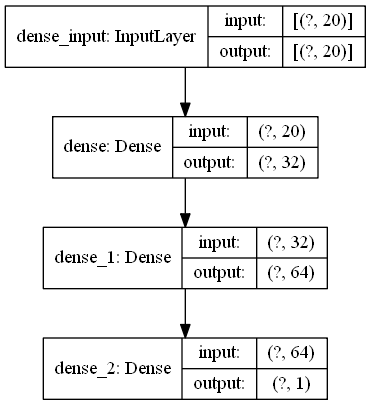

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(solcast, show_shapes = True, show_layer_names = True)

In [13]:
hist = solcast.fit(x_train, y_train, batch_size = 32, validation_data = (x_test, y_test), epochs = 250, verbose = 2)

Epoch 1/250
106/106 - 0s - loss: 0.4588 - root_mean_squared_error: 0.6773 - val_loss: 0.2609 - val_root_mean_squared_error: 0.5108
Epoch 2/250
106/106 - 0s - loss: 0.2414 - root_mean_squared_error: 0.4913 - val_loss: 0.2596 - val_root_mean_squared_error: 0.5095
Epoch 3/250
106/106 - 0s - loss: 0.2270 - root_mean_squared_error: 0.4765 - val_loss: 0.2514 - val_root_mean_squared_error: 0.5014
Epoch 4/250
106/106 - 0s - loss: 0.2221 - root_mean_squared_error: 0.4713 - val_loss: 0.2561 - val_root_mean_squared_error: 0.5060
Epoch 5/250
106/106 - 0s - loss: 0.2158 - root_mean_squared_error: 0.4645 - val_loss: 0.2484 - val_root_mean_squared_error: 0.4984
Epoch 6/250
106/106 - 0s - loss: 0.2110 - root_mean_squared_error: 0.4594 - val_loss: 0.2452 - val_root_mean_squared_error: 0.4952
Epoch 7/250
106/106 - 0s - loss: 0.2066 - root_mean_squared_error: 0.4546 - val_loss: 0.2512 - val_root_mean_squared_error: 0.5012
Epoch 8/250
106/106 - 0s - loss: 0.2002 - root_mean_squared_error: 0.4475 - val_los

Epoch 64/250
106/106 - 0s - loss: 0.1217 - root_mean_squared_error: 0.3488 - val_loss: 0.2394 - val_root_mean_squared_error: 0.4893
Epoch 65/250
106/106 - 0s - loss: 0.1215 - root_mean_squared_error: 0.3485 - val_loss: 0.2463 - val_root_mean_squared_error: 0.4963
Epoch 66/250
106/106 - 0s - loss: 0.1206 - root_mean_squared_error: 0.3473 - val_loss: 0.2432 - val_root_mean_squared_error: 0.4932
Epoch 67/250
106/106 - 0s - loss: 0.1215 - root_mean_squared_error: 0.3486 - val_loss: 0.2356 - val_root_mean_squared_error: 0.4854
Epoch 68/250
106/106 - 0s - loss: 0.1215 - root_mean_squared_error: 0.3486 - val_loss: 0.2445 - val_root_mean_squared_error: 0.4945
Epoch 69/250
106/106 - 0s - loss: 0.1193 - root_mean_squared_error: 0.3455 - val_loss: 0.2442 - val_root_mean_squared_error: 0.4942
Epoch 70/250
106/106 - 0s - loss: 0.1168 - root_mean_squared_error: 0.3417 - val_loss: 0.2417 - val_root_mean_squared_error: 0.4916
Epoch 71/250
106/106 - 0s - loss: 0.1207 - root_mean_squared_error: 0.3474 -

Epoch 126/250
106/106 - 0s - loss: 0.0900 - root_mean_squared_error: 0.2999 - val_loss: 0.2606 - val_root_mean_squared_error: 0.5105
Epoch 127/250
106/106 - 0s - loss: 0.0895 - root_mean_squared_error: 0.2991 - val_loss: 0.2548 - val_root_mean_squared_error: 0.5048
Epoch 128/250
106/106 - 0s - loss: 0.0882 - root_mean_squared_error: 0.2969 - val_loss: 0.2547 - val_root_mean_squared_error: 0.5046
Epoch 129/250
106/106 - 0s - loss: 0.0895 - root_mean_squared_error: 0.2992 - val_loss: 0.2626 - val_root_mean_squared_error: 0.5125
Epoch 130/250
106/106 - 0s - loss: 0.0879 - root_mean_squared_error: 0.2964 - val_loss: 0.2540 - val_root_mean_squared_error: 0.5040
Epoch 131/250
106/106 - 0s - loss: 0.0914 - root_mean_squared_error: 0.3023 - val_loss: 0.2738 - val_root_mean_squared_error: 0.5233
Epoch 132/250
106/106 - 0s - loss: 0.0886 - root_mean_squared_error: 0.2976 - val_loss: 0.2548 - val_root_mean_squared_error: 0.5048
Epoch 133/250
106/106 - 0s - loss: 0.0869 - root_mean_squared_error: 

Epoch 188/250
106/106 - 0s - loss: 0.0724 - root_mean_squared_error: 0.2691 - val_loss: 0.2682 - val_root_mean_squared_error: 0.5179
Epoch 189/250
106/106 - 0s - loss: 0.0697 - root_mean_squared_error: 0.2639 - val_loss: 0.2806 - val_root_mean_squared_error: 0.5298
Epoch 190/250
106/106 - 0s - loss: 0.0693 - root_mean_squared_error: 0.2633 - val_loss: 0.2765 - val_root_mean_squared_error: 0.5258
Epoch 191/250
106/106 - 0s - loss: 0.0686 - root_mean_squared_error: 0.2619 - val_loss: 0.2721 - val_root_mean_squared_error: 0.5216
Epoch 192/250
106/106 - 0s - loss: 0.0692 - root_mean_squared_error: 0.2630 - val_loss: 0.2738 - val_root_mean_squared_error: 0.5233
Epoch 193/250
106/106 - 0s - loss: 0.0672 - root_mean_squared_error: 0.2592 - val_loss: 0.2748 - val_root_mean_squared_error: 0.5242
Epoch 194/250
106/106 - 0s - loss: 0.0706 - root_mean_squared_error: 0.2657 - val_loss: 0.2767 - val_root_mean_squared_error: 0.5260
Epoch 195/250
106/106 - 0s - loss: 0.0685 - root_mean_squared_error: 

Epoch 250/250
106/106 - 0s - loss: 0.0557 - root_mean_squared_error: 0.2360 - val_loss: 0.2755 - val_root_mean_squared_error: 0.5249


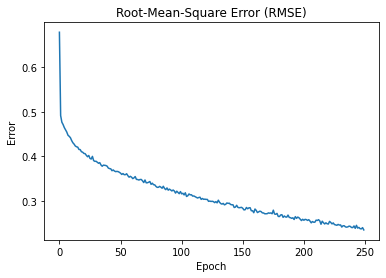

In [14]:
plt.plot(hist.history['root_mean_squared_error'])
plt.title('Root-Mean-Square Error (RMSE)')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

In [15]:
solcast.evaluate(x_train, y_train)

106/106 [==============================] - 0s 737us/step - loss: 0.0543 - root_mean_squared_error: 0.2330


[0.054297734051942825, 0.23301874101161957]

## 6. Results

In [16]:
from sklearn.metrics import mean_squared_error
y_pred = solcast.predict(x_test) 
y_pred_orig = y_sc.inverse_transform(y_pred) 
y_test_orig = y_sc.inverse_transform(y_test) 
RMSE_orig = mean_squared_error(y_pred_orig, y_test_orig, squared=False)
RMSE_orig

492.61687858810984

In [17]:
train_pred = solcast.predict(x_train) 
train_pred_orig = y_sc.inverse_transform(train_pred) 
y_train_orig = y_sc.inverse_transform(y_train) 
mean_squared_error(train_pred_orig, y_train_orig, squared = False)

218.6793444210419

In [18]:
from sklearn.metrics import r2_score
r2_score(y_pred_orig, y_test_orig)

0.7086232049360454

In [19]:
r2_score(train_pred_orig, y_train_orig)

0.9427056542479775

In [20]:
np.concatenate((train_pred_orig, y_train_orig), 1)

array([[ 810.00689697,  772.99624   ],
       [ 606.07617188,  468.02361   ],
       [2538.28369141, 2706.2756    ],
       ...,
       [2033.14355469,  322.64611   ],
       [2367.83496094, 2467.6794    ],
       [ 899.22290039,  890.89      ]])

In [21]:
np.concatenate((y_pred_orig, y_test_orig), 1)

array([[1452.62670898, 1730.1885    ],
       [1401.5222168 ,  904.50111   ],
       [1464.61450195, 1112.4367    ],
       ...,
       [ 702.13214111,  214.27725   ],
       [ 125.38083649,  344.17139   ],
       [1908.53918457, 1215.9592    ]])

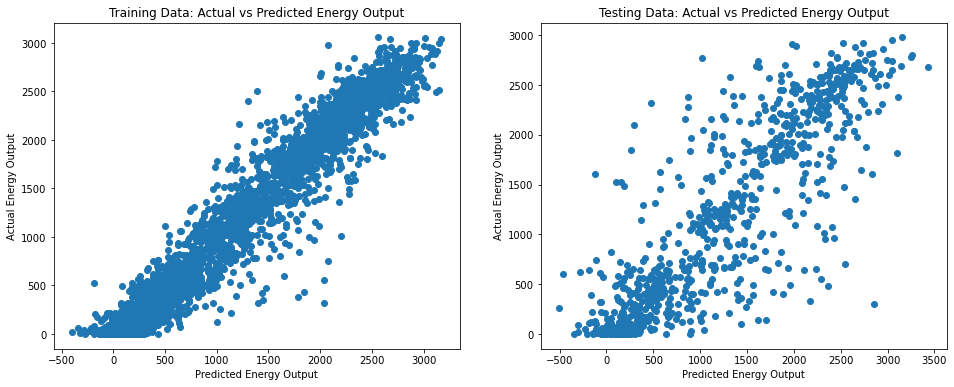

In [22]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Energy Output')
plt.ylabel('Actual Energy Output')
plt.title('Testing Data: Actual vs Predicted Energy Output')

plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Energy Output')
plt.ylabel('Actual Energy Output')
plt.title('Training Data: Actual vs Predicted Energy Output')
plt.show()

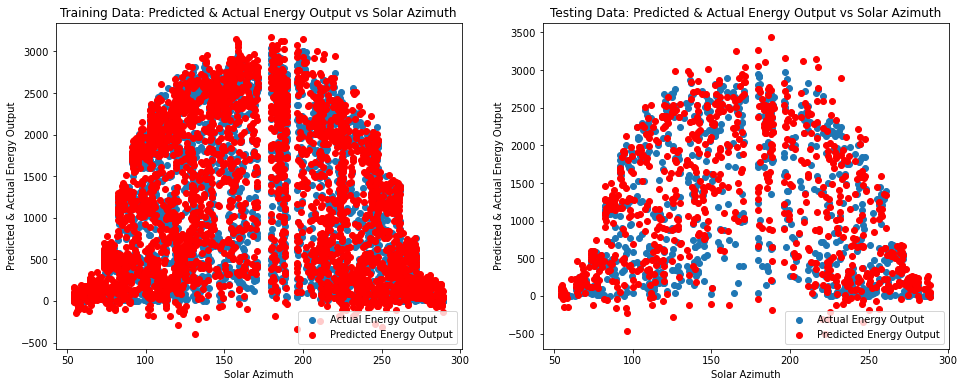

In [23]:
x_axis = x_sc.inverse_transform(x_train)[:,-1]
x2_axis = x_sc.inverse_transform(x_test)[:,-1]
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
plt.scatter(x_axis, y_train_orig, label = 'Actual Energy Output')
plt.scatter(x_axis, train_pred_orig, c = 'red', label = 'Predicted Energy Output')
plt.ylabel('Predicted & Actual Energy Output')
plt.xlabel('Solar Azimuth')
plt.title('Training Data: Predicted & Actual Energy Output vs Solar Azimuth')
plt.legend(loc = 'lower right')

plt.subplot(1,2,2)
plt.scatter(x2_axis, y_test_orig, label = 'Actual Energy Output')
plt.scatter(x2_axis, y_pred_orig, c = 'red', label = 'Predicted Energy Output')
plt.ylabel('Predicted & Actual Energy Output')
plt.xlabel('Solar Azimuth')
plt.title('Testing Data: Predicted & Actual Energy Output vs Solar Azimuth')
plt.legend(loc = 'lower right')
plt.show()

In [24]:
results = np.concatenate((y_pred_orig, y_test_orig), 1)
results = pd.DataFrame(data = results)
results.columns = ['Predicted Energy Output', 'Actual Energy Output']
pd.options.display.float_format = "{:,.2f}".format
results[42:50]

,Predicted Energy Output,Actual Energy Output
42,263.39,101.29
43,494.86,426.06
44,"2,339.51","2,269.99"
45,"2,070.71","1,898.36"
46,"1,150.82","1,975.26"
47,"2,845.43","2,645.27"
48,"2,243.22","2,236.88"
49,"1,911.77","2,107.22"


In [25]:
sc = StandardScaler()
pred_whole = solcast.predict(sc.fit_transform(x))
pred_whole_orig = y_sc.inverse_transform(pred_whole)
pred_whole_orig

array([[ 555.51135],
       [1312.1981 ],
       [2242.0698 ],
       ...,
       [ 188.82492],
       [  97.27738],
       [-179.8292 ]], dtype=float32)

In [26]:
y

array([[ 454.10095 ],
       [1411.9994  ],
       [2214.8493  ],
       ...,
       [ 158.36778 ],
       [ 126.95306 ],
       [  20.055031]])

In [27]:
r2_score(pred_whole_orig, y)

0.8957242395325977

In [28]:
df_results = pd.DataFrame.from_dict({
    'Overall R2 Score': r2_score(pred_whole_orig, y),
    'R2 Score of Training Data': r2_score(train_pred_orig, y_train_orig),
    'R2 Score of Testing Data': r2_score(y_pred_orig, y_test_orig),
    'Mean of Testing Data': np.mean(y_pred_orig),
    'Standard Deviation of Testing Data': np.std(y_pred_orig),
    'Relative Standard Deviation': np.std(y_pred_orig) / np.mean(y_pred_orig),
}, orient = 'index', columns = ['Value'])
display(df_results.style.background_gradient(cmap = 'afmhot', axis = 0))

,Value
Overall R2 Score,0.895724
R2 Score of Training Data,0.942706
R2 Score of Testing Data,0.708623
Mean of Testing Data,1198.457886
Standard Deviation of Testing Data,912.602844
Relative Standard Deviation,0.761481


In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
lasso_coeff = pd.DataFrame({'Feature Importance':lasso.coef_}, index = data.columns[:-1])
lasso_coeff.sort_values('Feature Importance', ascending = False)

,Feature Importance
shortwave_radiation_backwards_sfc,0.36
mean_sea_level_pressure_MSL,0.10
wind_speed_80_m_above_gnd,0.04
snowfall_amount_sfc,0.02
wind_direction_80_m_above_gnd,0.01
wind_direction_10_m_above_gnd,0.01
wind_speed_10_m_above_gnd,0.00
wind_direction_900_mb,-0.00
total_precipitation_sfc,-0.02
medium_cloud_cover_mid_cld_lay,-0.02


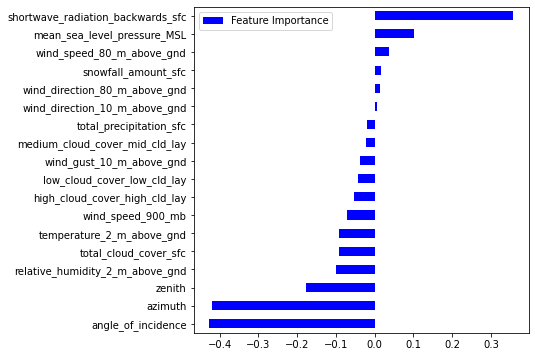

In [30]:
g = lasso_coeff[lasso_coeff['Feature Importance'] != 0].sort_values('Feature Importance').plot(kind = 'barh', figsize = (6,6), cmap = 'winter')